# Sélection du meilleur modèle

Dans notre projet, nous traitons un problème de classification binaire où nous devons classer le compte Instagram d'un utilisateur donné comme réel ou faux. Par conséquent, nous nous limiterons à expliquer les différents algorithmes de classification binaire possibles et nous comprendrons pourquoi ils sont considérés comme adaptés à notre projet dans les sections ultérieures.

Critères de sélection: 
- Accuracy
- Recall 
- Précision

# II- Importation des données 

In [76]:
import pandas as pd
#load json file from data folder
data = pd.read_json('../data/accountData.json')
print(data.shape)
print(data.columns)
print(data.dtypes)
data.head(10)

(1194, 10)
Index(['id', 'isFake', 'userBiographyLength', 'userFollowerCount',
       'userFollowingCount', 'userHasProfilPic', 'userIsPrivate',
       'userMediaCount', 'usernameDigitCount', 'usernameLength'],
      dtype='object')
id                     int64
isFake                 int64
userBiographyLength    int64
userFollowerCount      int64
userFollowingCount     int64
userHasProfilPic       int64
userIsPrivate          int64
userMediaCount         int64
usernameDigitCount     int64
usernameLength         int64
dtype: object


,id,isFake,userBiographyLength,userFollowerCount,userFollowingCount,userHasProfilPic,userIsPrivate,userMediaCount,usernameDigitCount,usernameLength
0,0,1,0,25,1937,1,1,0,0,10
1,1,1,0,324,4122,1,0,0,4,15
2,2,1,0,15,399,0,0,0,3,12
3,3,1,0,14,107,1,0,1,1,10
4,4,1,0,264,4651,1,0,0,0,14
5,5,1,0,33,1470,1,1,2,4,13
6,6,1,30,420,4883,1,0,8,0,12
7,7,1,0,442,6662,1,0,396,0,11
8,8,1,0,816,7497,1,0,85,3,15
9,9,1,1,150,6631,1,1,0,3,8


## 1- Vérification des données
Nous allons faire deux choses:
1. Vérifier s'il y a des valeurs non renseignées (nulles)
`print(data.isnull().sum())`
2. Afficher la description des données avec la fonction describe: `data.describe()`



In [77]:
#compter les valeurs nulles
print(data.isnull().sum())

#description des données
print(data.describe())

id                     0
isFake                 0
userBiographyLength    0
userFollowerCount      0
userFollowingCount     0
userHasProfilPic       0
userIsPrivate          0
userMediaCount         0
usernameDigitCount     0
usernameLength         0
dtype: int64
                id       isFake  userBiographyLength  userFollowerCount  \
count  1194.000000  1194.000000          1194.000000        1194.000000   
mean    596.500000     0.167504            22.847571         369.095477   
std     344.822418     0.373582            33.492868         372.775741   
min       0.000000     0.000000             0.000000           0.000000   
25%     298.250000     0.000000             0.000000         152.000000   
50%     596.500000     0.000000             7.000000         304.000000   
75%     894.750000     0.000000            33.000000         481.000000   
max    1193.000000     1.000000           150.000000        4492.000000   

       userFollowingCount  userHasProfilPic  userIsPrivate  u

## 3- Séparation des données input(X)/output(Y)

On recupère le résultat, et X ne doit pas avoir la valeur de l'étiquette

In [78]:
Y = data.isFake
X = data.drop(['isFake', 'id', 'userIsPrivate'], axis=1)


## 3- Découpage des données train/test

In [79]:
#Subdivision des données en données train et test avec la fonction train_test_split du module model_selection de pandas
#importation du module model_selection de scikit learn
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=242)

# IV - Classification avec le modèle de régression logistique
Comme première approche de classification, nous utiliserons la régression logistique.


[0.95138889 0.94405594 0.95104895 0.95104895 0.95804196]


/home/malinlevaud/Dev/M2/bond/env/lib64/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/malinlevaud/Dev/M2/bond/env/lib64/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

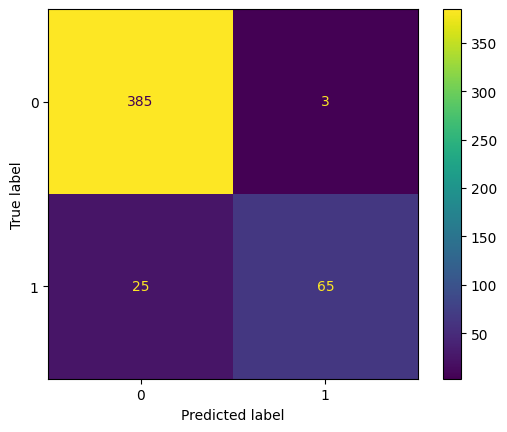

In [80]:
#importer la classe LogisticRegression
from sklearn.linear_model import LogisticRegression
#Importer le module metric
from sklearn import metrics
#Importer le module cross_val_score
from sklearn.model_selection import cross_val_score

#création d'une instance de la classe : lr_model
lr_model= LogisticRegression()

#exécution de l'instance sur les données d'apprentissage x1_train et x2_train
#c.à d . construction du modèle prédictif
lr_model.fit(X_train, Y_train)

#validation croisée de la régression logistique
scores = cross_val_score(lr_model, X_train, Y_train, cv=5)
print(scores)

#application des modèles sur les données test
lr_pred= lr_model.predict(X_test)

#création et affichage de la matrice de confusion

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

conf = confusion_matrix(Y_test, lr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf)
disp.plot()

# VII- Classification par les SVM
Comme deuxième approche de classification, nous utiliserons les SVM.


[0.90972222 0.84615385 0.93006993 0.96503497 0.94405594]


/home/malinlevaud/Dev/M2/bond/env/lib64/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/malinlevaud/Dev/M2/bond/env/lib64/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/malinlevaud/Dev/M2/bond/env/lib64/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/malinlevaud/Dev/M2/bond/env/lib64/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/malinlevaud/Dev/M2/bond/env/lib64/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/malinlevaud/Dev/M2/bond/env/l

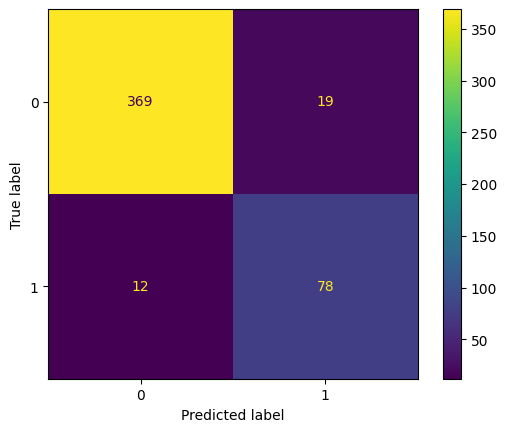

In [81]:
#importer la classe SVC
from sklearn.svm import LinearSVC
#Importer le module validation croisée
from sklearn.model_selection import cross_val_score


#instanciation de l’objet svm_model
svm_model= LinearSVC()

#exécution de l'instance sur les données d'apprentissage
svm_model.fit(X_train, Y_train)

#validation croisée de SVC
scores = cross_val_score(svm_model, X_train, Y_train, cv=5)
print(scores)

#appliquer le modèle sur les données test
svm_pred= svm_model.predict(X_test)

#création et affichage de la matrice de confusion

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

conf = confusion_matrix(Y_test, svm_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf)
disp.plot()


# VIII - Classification par les arbres de décision

Comme troisième modèle de classification, nous utiliserons les arbres de décision.

[0.95138889 0.93706294 0.94405594 0.95804196 0.95804196]


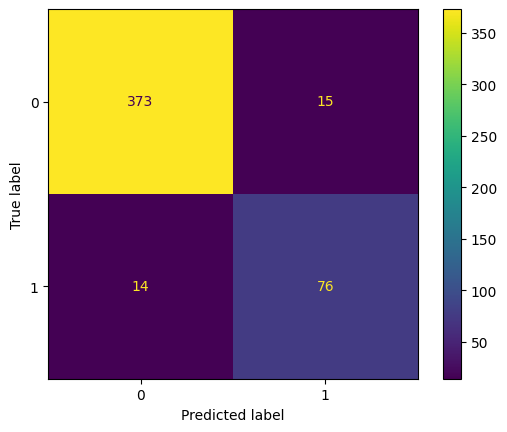

In [82]:
# import tree from scikit-learn library
from sklearn import tree
#Importer le module validation croisée
from sklearn.model_selection import cross_val_score

tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X_train, Y_train)

#validation croisée de l'arbre de décision
scores = cross_val_score(tree_model, X_train, Y_train, cv=5)
print(scores)

tree_pred = tree_model.predict(X_test)

#création et affichage de la matrice de confusion

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

conf = confusion_matrix(Y_test, tree_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf)
disp.plot()

# IX- Classification par les forêts aléatoires

[0.96527778 0.97202797 0.96503497 0.91608392 0.95804196]


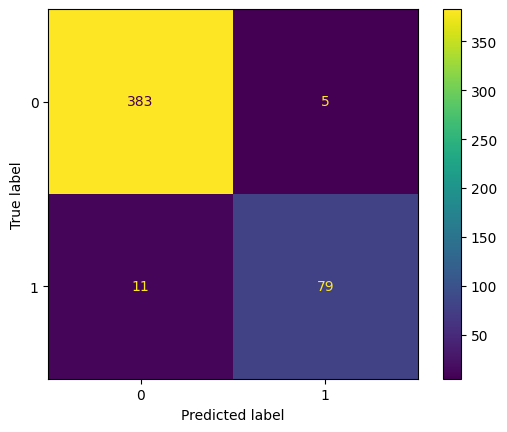

In [83]:
# import random forest classifier from scikit-learn library
from sklearn.ensemble import RandomForestClassifier
#Importer le module validation croisée
from sklearn.model_selection import cross_val_score

rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)

#validation croisée de la forêt aléatoire
scores = cross_val_score(rf_model, X_train, Y_train, cv=5)
print(scores)

rf_pred = rf_model.predict(X_test)

#création et affichage de la matrice de confusion

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

conf = confusion_matrix(Y_test, rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf)
disp.plot()

# X- Classification par KNN

[0.94444444 0.93706294 0.93706294 0.93006993 0.95804196]


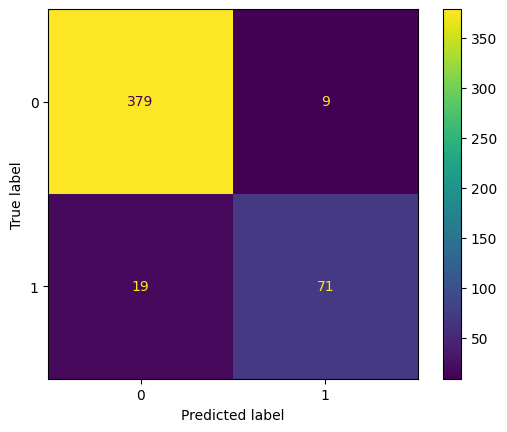

In [84]:
# import knn from scikit-learn library
from sklearn.neighbors import KNeighborsClassifier
#Importer le module validation croisée
from sklearn.model_selection import cross_val_score

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)

#validation croisée de KNN
scores = cross_val_score(knn_model, X_train, Y_train, cv=5)
print(scores)

knn_pred = knn_model.predict(X_test)

#création et affichage de la matrice de confusion

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

conf = confusion_matrix(Y_test, knn_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf)
disp.plot()

# VIII- Validation des modèles

Comparer les résultats de chaquue accurucay score

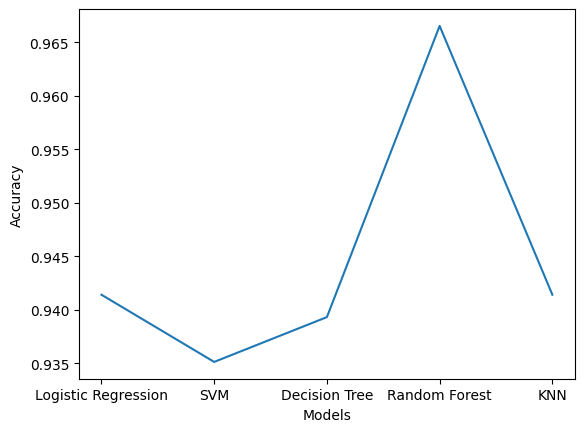

In [85]:
#Importer le module metric
from sklearn import metrics
#import histogram plotting library
import matplotlib.pyplot as plt

#Calculer les scores des modèles
svm_model_score=metrics.accuracy_score(svm_pred, Y_test)
lr_model_score=metrics.accuracy_score(lr_pred, Y_test)
tree_model_score=metrics.accuracy_score(tree_pred, Y_test)
rf_model_score=metrics.accuracy_score(rf_pred, Y_test)
knn_model_score=metrics.accuracy_score(knn_pred, Y_test)

#Ajouter tous les scores à une liste
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'KNN']
accuracy = [lr_model_score, svm_model_score, tree_model_score, rf_model_score, knn_model_score]

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.plot(models, accuracy)


Comparer les résultats de chaque recall score 

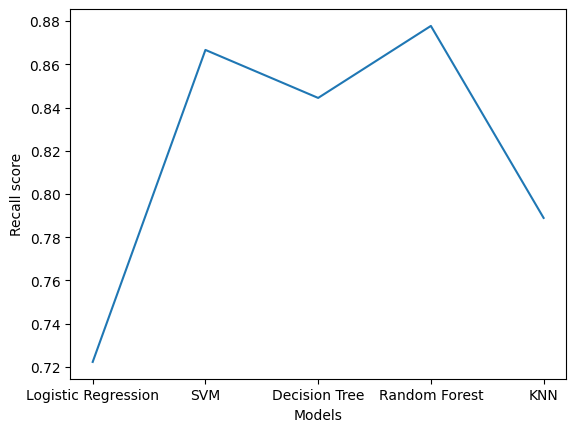

In [86]:
# compare recall score 
from sklearn.metrics import recall_score

svm_recall = recall_score(Y_test, svm_pred)
lr_recall = recall_score(Y_test, lr_pred)
tree_recall = recall_score(Y_test, tree_pred)
rf_recall = recall_score(Y_test, rf_pred)
knn_recall = recall_score(Y_test, knn_pred)

#Ajouter tous les scores à une liste
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'KNN']
accuracy = [lr_recall, svm_recall, tree_recall, rf_recall, knn_recall]

plt.xlabel('Models')
plt.ylabel('Recall score')
plt.plot(models, accuracy)

Comparer les résultats de chaque precision score 

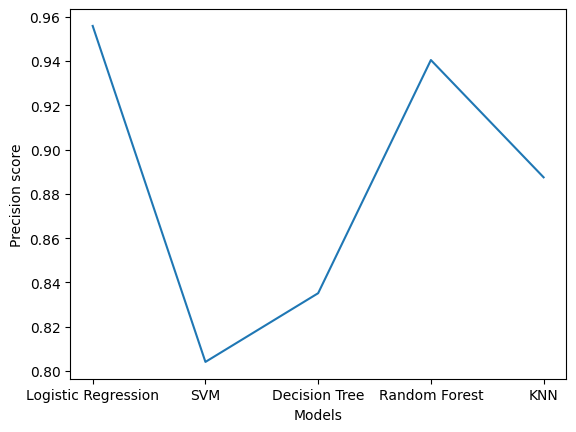

In [87]:
# compare precision score

from sklearn.metrics import precision_score

svm_precision = precision_score(Y_test, svm_pred)
lr_precision = precision_score(Y_test, lr_pred)
tree_precision = precision_score(Y_test, tree_pred)
rf_precision = precision_score(Y_test, rf_pred)
knn_precision = precision_score(Y_test, knn_pred)

#Ajouter tous les scores à une liste
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'KNN']
accuracy = [lr_precision, svm_precision, tree_precision, rf_precision, knn_precision]

plt.xlabel('Models')
plt.ylabel('Precision score')
plt.plot(models, accuracy)


# Sauvegarde du meilleur modèle

In [88]:
# save the rf model
import pickle
pickle.dump(rf_model, open('../rf_model.pkl', 'wb'))

# Test sur un autre dataset

In [89]:
# load the data from the data source
data_twitter = pd.read_json('../data/accountTwitterData.json')
print(data_twitter.shape)
data_twitter.head()

(2818, 9)


,id,isFake,userBiographyLength,userFollowerCount,userFollowingCount,userHasProfilPic,userMediaCount,usernameDigitCount,usernameLength
0,370098498,1,0,4,588,1,24,0,12
1,37384589,1,0,57,693,1,656,4,11
2,72110028,1,0,15,104,1,1234,0,7
3,82885728,1,0,14,227,1,573,0,9
4,110120789,1,0,18,519,1,675,0,10


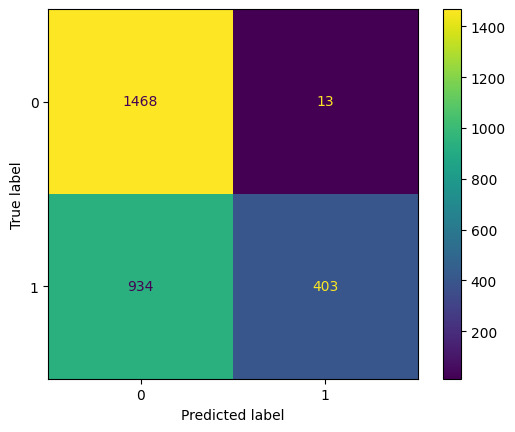

In [90]:
X = data_twitter.isFake
Y = data_twitter.drop(['isFake', 'id'], axis=1)


rf_twitter_pred = rf_model.predict(Y)

#création et affichage de la matrice de confusion

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

conf = confusion_matrix(X, rf_twitter_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf)
disp.plot()